In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

In [3]:
class_names = [ 'T-shirt', 'Trousers', 'Pullovers', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
## Data Exploration

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
#preprocessing


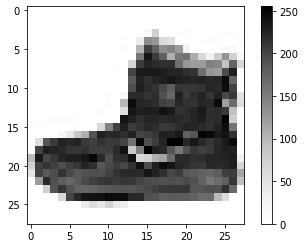

In [9]:
plt.figure()
plt.imshow(train_images[0], cmap = 'Greys')
plt.colorbar()
plt.gca().grid(False)

In [10]:
## Feature Scaling

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

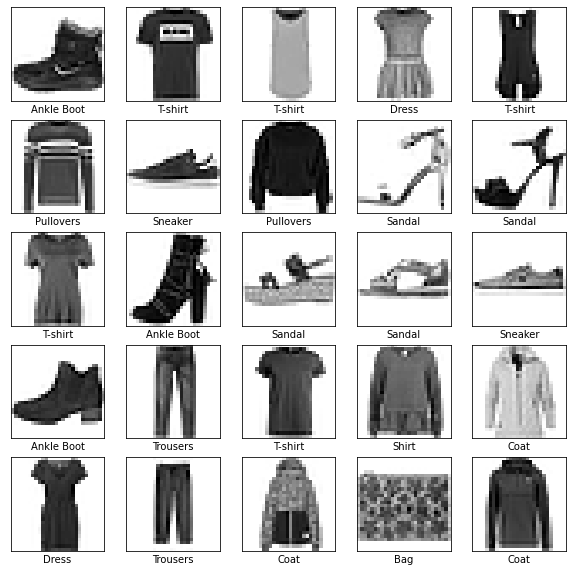

In [14]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
###build model of CNN

In [16]:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [18]:
##compile the model

In [19]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
## fitting the model

In [21]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.9177 - accuracy: 0.6704
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5663 - accuracy: 0.7892
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5059 - accuracy: 0.8141
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4673 - accuracy: 0.8321
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4399 - accuracy: 0.8435


In [22]:
#accuracy evaluation"

In [23]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy of the model is {test_accuracy} or {round(test_accuracy*100,2)}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.4647 - accuracy: 0.8322
Test accuracy of the model is 0.8321999907493591 or 83.22%


It's a generalized model not overfit nor underfit

In [24]:
## Make predictions on all(TESTING MODEL)

In [25]:
preds = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [26]:
preds[7]

array([8.8500828e-03, 4.7339874e-04, 1.2717706e-01, 2.5712042e-03,
       3.5611472e-01, 3.7138393e-06, 4.9526083e-01, 4.5207203e-11,
       9.5489379e-03, 2.2377812e-08], dtype=float32)

In [27]:
np.argmax(preds[7])

6

In [28]:
test_labels[7]

6

In [29]:
# Visualization

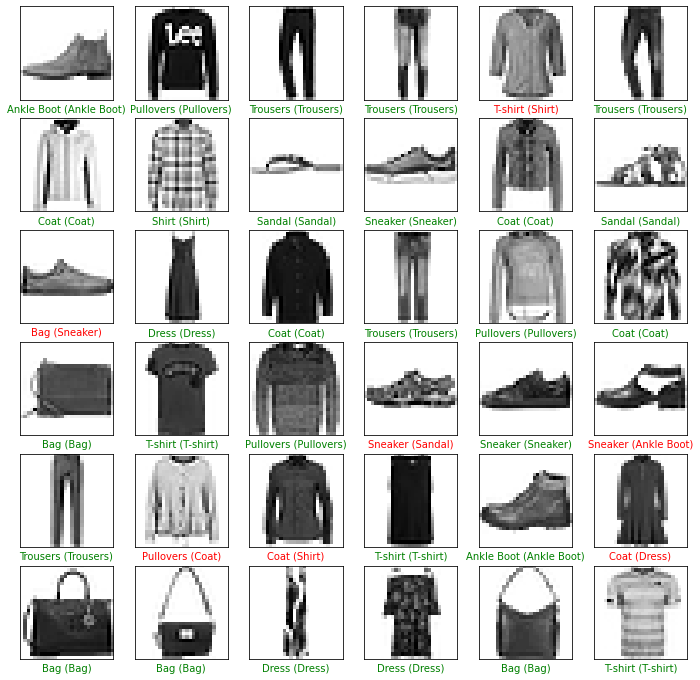

In [30]:

plt.figure(figsize=(12, 12))
for val in range(36):
    plt.subplot(6, 6, val + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[val], cmap=plt.cm.binary)
    pred_label = np.argmax(preds[val])
    true_label = test_labels[val]

    if pred_label == true_label:
        text_color = 'green'
    else:
        text_color = 'red'
    
    plt.xlabel(f"{class_names[pred_label]} ({class_names[true_label]})", color=text_color)

plt.show()


In [31]:
# Confusion Matrix

<AxesSubplot:>

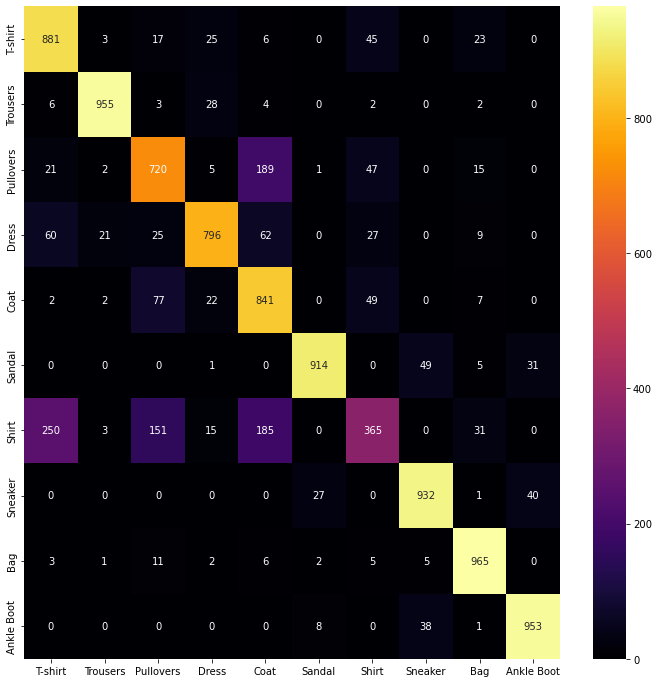

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (12,12))
matrix_pred = [np.argmax(label) for label in preds]
conf_matrix = confusion_matrix(test_labels, matrix_pred)

#viz
sns.heatmap(conf_matrix, cmap= 'inferno', annot= True, fmt = 'd', xticklabels= class_names, yticklabels = class_names)

In [33]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, matrix_pred, target_names = class_names)
print(report)

              precision    recall  f1-score   support

     T-shirt       0.72      0.88      0.79      1000
    Trousers       0.97      0.95      0.96      1000
   Pullovers       0.72      0.72      0.72      1000
       Dress       0.89      0.80      0.84      1000
        Coat       0.65      0.84      0.73      1000
      Sandal       0.96      0.91      0.94      1000
       Shirt       0.68      0.36      0.47      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.91      0.96      0.94      1000
  Ankle Boot       0.93      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



Shirt is lesser but also is predicted good

In [34]:
#Saving the model


In [35]:
model.save('model_nitex_task.h5')

In [36]:
deploy = keras.models.load_model('model_nitex_task.h5')

In [37]:
pred_after_save = deploy.predict(test_images).round(2)

313/313 [==============================] - 1s 3ms/step


In [38]:
np.argmax(pred_after_save)

21

In [39]:
!pip freeze > req66uirements.txt
